In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_excel('data/dataset.xlsx')

In [4]:
data.head()

,Name,FavoriteSeries,StarWars,MetroTime,ExamScore,HomeInternetSpeed
0,Акчурина Анастасия Максимовна,"Друзья, Шерлок, Стыд, Рик и Морти, Игра престо...",0.0,15.0,282.0,NaN
1,Асадуллин Амир Искандерович,"Gravity Falls, South Park, Futurama, Star vs. ...",164523.0,0.0,329.0,плохо
2,Болотина Елизавета Александровна,"Доктор хаус, Конец этого еххного мира, Оранжев...",543612.0,30.0,337.0,хорошо
3,Борщенюк Александра Витальевна,"Черное зеркало, Как я встретил вашу маму, Спле...",456123.0,40.0,351.0,средне
4,Веденеев Степан Васильевич,"Игра престолов, Теория большого взрыва",456321.0,30.0,300.0,хорошо


In [5]:
data.tail()

,Name,FavoriteSeries,StarWars,MetroTime,ExamScore,HomeInternetSpeed
51,Поляков Владимир Игоревич,Шерлок,312546.0,NaN,NaN,хорошо
52,Саторов Шерзод Музаффарович,Шерлок,NaN,NaN,NaN,плохо
53,Стахова Марианна Владимировна,"Во все тяжкие, Чёрное зеркало",0.0,NaN,280.0,хорошо
54,Тябутов Иван Михайлович,Молодёжка,456132.0,90.0,320.0,средне
55,Шибаев Виктор Михайлович,"Игра престолов, Рик и морти, Шерлок, Острые ко...",635412.0,60.0,323.0,средне


In [6]:
data.shape

(56, 6)

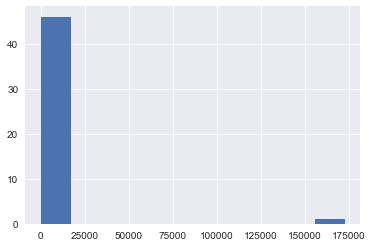

In [7]:
data.MetroTime.hist()

In [8]:
data.MetroTime.max()

172800.0

In [9]:
data.MetroTime[data.MetroTime==data.MetroTime.max()] = 30

(0, 161.6)

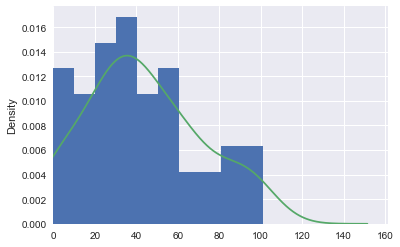

In [10]:
data.MetroTime.hist(normed=True, bins=10)
data.MetroTime.plot.kde()
plt.xlim(0)

In [11]:
data.MetroTime = data.MetroTime.fillna(0)

In [12]:
data['UseMetro'] = data.MetroTime != 0

In [13]:
data.UseMetro.value_counts()

True     43
False    13
Name: UseMetro, dtype: int64

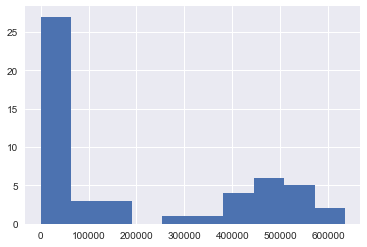

In [14]:
data.StarWars.hist(bins=10)

In [15]:
data.StarWars.fillna(0, inplace=True)

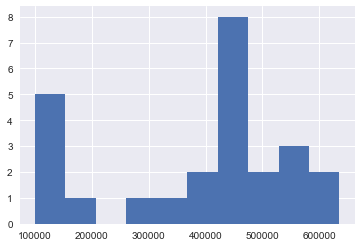

In [16]:
data.StarWars[data.StarWars>0].hist(bins=10)

In [17]:
data.StarWars = data.StarWars.astype(int).astype(str)

In [18]:
data.StarWars = data.StarWars.replace('0', '000000')

In [19]:
data.StarWars = data.StarWars.apply(lambda row: [x for x in row])

In [20]:
StarWars = pd.DataFrame(data.StarWars.tolist())
StarWars.columns = ["SW_{}".format(i) for i in range(1, 7)]

In [21]:
StarWars.head()

,SW_1,SW_2,SW_3,SW_4,SW_5,SW_6
0,0,0,0,0,0,0
1,1,6,4,5,2,3
2,5,4,3,6,1,2
3,4,5,6,1,2,3
4,4,5,6,3,2,1


In [22]:
#data = pd.concat([data, StarWars.astype(int)], axis=1)

In [23]:
data.head()

,Name,FavoriteSeries,StarWars,MetroTime,ExamScore,HomeInternetSpeed,UseMetro
0,Акчурина Анастасия Максимовна,"Друзья, Шерлок, Стыд, Рик и Морти, Игра престо...","[0, 0, 0, 0, 0, 0]",15.0,282.0,NaN,True
1,Асадуллин Амир Искандерович,"Gravity Falls, South Park, Futurama, Star vs. ...","[1, 6, 4, 5, 2, 3]",0.0,329.0,плохо,False
2,Болотина Елизавета Александровна,"Доктор хаус, Конец этого еххного мира, Оранжев...","[5, 4, 3, 6, 1, 2]",30.0,337.0,хорошо,True
3,Борщенюк Александра Витальевна,"Черное зеркало, Как я встретил вашу маму, Спле...","[4, 5, 6, 1, 2, 3]",40.0,351.0,средне,True
4,Веденеев Степан Васильевич,"Игра престолов, Теория большого взрыва","[4, 5, 6, 3, 2, 1]",30.0,300.0,хорошо,True


In [24]:
data.drop(['StarWars'], axis=1, inplace=True)

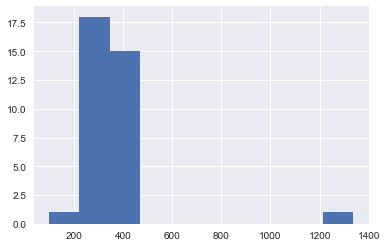

In [25]:
data.ExamScore.hist()

In [26]:
data.ExamScore[data.ExamScore==data.ExamScore.max()] = 337

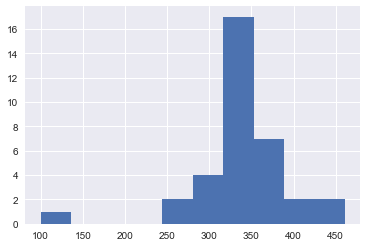

In [27]:
data.ExamScore.hist()

In [28]:
data['ExamQuantity'] = data.ExamScore//100 + (data.ExamScore%100 > 0).astype(int)
data['ExamQuantity'] = data['ExamQuantity'].fillna(0).astype(int)

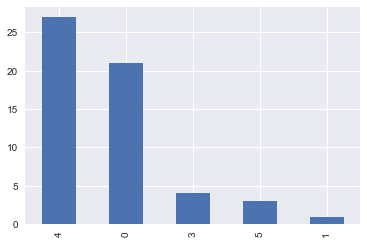

In [29]:
data.ExamQuantity.value_counts().plot.bar();

In [30]:
data['AverageScore'] = data.ExamScore.div(data.ExamQuantity)

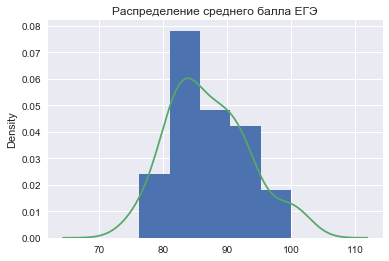

In [31]:
data.AverageScore.hist(bins=5, normed=True)
data.AverageScore.plot.kde()
plt.title("Распределение среднего балла ЕГЭ");

In [32]:
data.drop(['ExamScore'], axis=1, inplace=True)

In [33]:
data['ScoreUnknown'] = data.AverageScore.isnull()

In [34]:
data.ScoreUnknown.value_counts()

False    35
True     21
Name: ScoreUnknown, dtype: int64

In [35]:
data.AverageScore = data.AverageScore.fillna(data.AverageScore.median())

In [36]:
data.head()

,Name,FavoriteSeries,MetroTime,HomeInternetSpeed,UseMetro,ExamQuantity,AverageScore,ScoreUnknown
0,Акчурина Анастасия Максимовна,"Друзья, Шерлок, Стыд, Рик и Морти, Игра престо...",15.0,NaN,True,3,94.00,False
1,Асадуллин Амир Искандерович,"Gravity Falls, South Park, Futurama, Star vs. ...",0.0,плохо,False,4,82.25,False
2,Болотина Елизавета Александровна,"Доктор хаус, Конец этого еххного мира, Оранжев...",30.0,хорошо,True,4,84.25,False
3,Борщенюк Александра Витальевна,"Черное зеркало, Как я встретил вашу маму, Спле...",40.0,средне,True,4,87.75,False
4,Веденеев Степан Васильевич,"Игра престолов, Теория большого взрыва",30.0,хорошо,True,3,100.00,False


In [37]:
data.HomeInternetSpeed.value_counts()

хорошо    19
средне    17
плохо      9
Name: HomeInternetSpeed, dtype: int64

In [38]:
data.HomeInternetSpeed = data.HomeInternetSpeed.map({'хорошо':1, "средне":0, "плохо":-1})

In [39]:
data.isnull().sum()

Name                  0
FavoriteSeries        6
MetroTime             0
HomeInternetSpeed    11
UseMetro              0
ExamQuantity          0
AverageScore          0
ScoreUnknown          0
dtype: int64

In [40]:
data['InternetSpeedUnknown'] = data.HomeInternetSpeed.isnull()

In [41]:
data.HomeInternetSpeed = data.HomeInternetSpeed.fillna(0).astype(int)

In [42]:
data.head()

,Name,FavoriteSeries,MetroTime,HomeInternetSpeed,UseMetro,ExamQuantity,AverageScore,ScoreUnknown,InternetSpeedUnknown
0,Акчурина Анастасия Максимовна,"Друзья, Шерлок, Стыд, Рик и Морти, Игра престо...",15.0,0,True,3,94.00,False,True
1,Асадуллин Амир Искандерович,"Gravity Falls, South Park, Futurama, Star vs. ...",0.0,-1,False,4,82.25,False,False
2,Болотина Елизавета Александровна,"Доктор хаус, Конец этого еххного мира, Оранжев...",30.0,1,True,4,84.25,False,False
3,Борщенюк Александра Витальевна,"Черное зеркало, Как я встретил вашу маму, Спле...",40.0,0,True,4,87.75,False,False
4,Веденеев Степан Васильевич,"Игра престолов, Теория большого взрыва",30.0,1,True,3,100.00,False,False


In [43]:
data.FavoriteSeries = data.FavoriteSeries.str.lower()

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
vectorizer = CountVectorizer()

In [46]:
data.FavoriteSeries.fillna('noseries', inplace=True)

In [47]:
data.FavoriteSeries_processed = data.FavoriteSeries.str.split(',')

data.FavoriteSeries_processed = data.FavoriteSeries_processed.apply(
    lambda row: [x.strip().replace(' ', '_') for x in row])

In [48]:
data.FavoriteSeries_processed = data.FavoriteSeries_processed.apply(lambda row: ",".join(row))

In [49]:
FavoriteSeries_processed = vectorizer.fit_transform(data.FavoriteSeries_processed)

In [50]:
FavoriteSeries_processed = pd.DataFrame(FavoriteSeries_processed.toarray())
FavoriteSeries_processed.columns = vectorizer.get_feature_names()

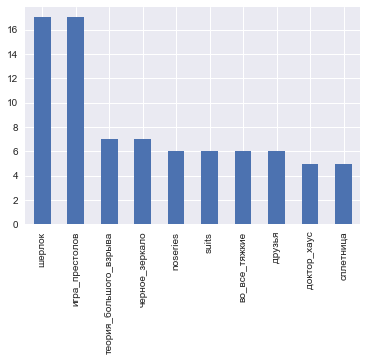

In [51]:
FavoriteSeries_processed.sum().sort_values(ascending=False).head(10).plot.bar()

In [52]:
top_ten_series = FavoriteSeries_processed.sum().sort_values(ascending=False).head(10).index

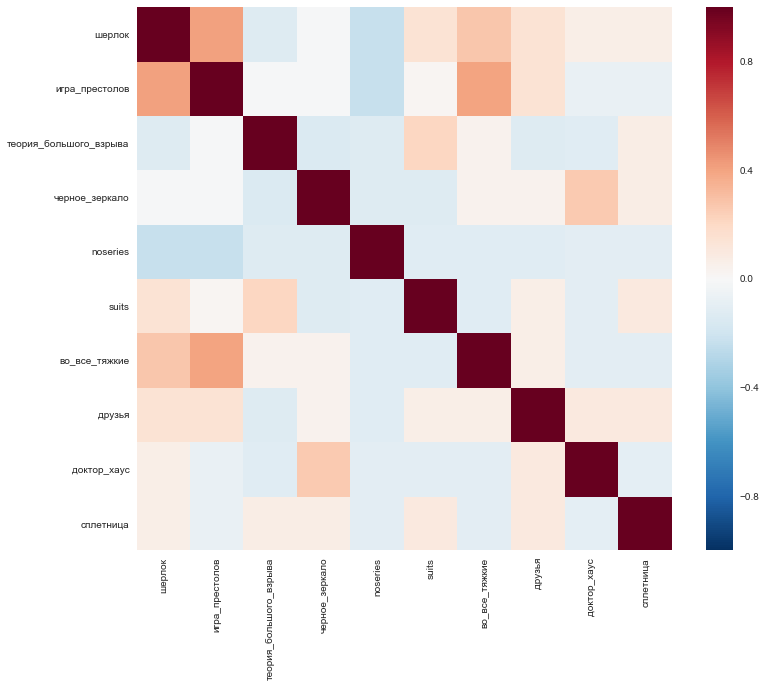

In [53]:
plt.figure(figsize = (12, 10))
sns.heatmap(FavoriteSeries_processed[top_ten_series].corr('spearman'))

In [54]:
data = pd.concat([data, FavoriteSeries_processed[top_ten_series]], axis=1)

In [55]:
data['TotalSeriesWatched'] = FavoriteSeries_processed.sum(1)

In [56]:
data.head()

,Name,FavoriteSeries,MetroTime,HomeInternetSpeed,UseMetro,ExamQuantity,AverageScore,ScoreUnknown,InternetSpeedUnknown,шерлок,игра_престолов,теория_большого_взрыва,черное_зеркало,noseries,suits,во_все_тяжкие,друзья,доктор_хаус,сплетница,TotalSeriesWatched
0,Акчурина Анастасия Максимовна,"друзья, шерлок, стыд, рик и морти, игра престо...",15.0,0,True,3,94.00,False,True,1,1,0,0,0,0,0,1,1,0,7
1,Асадуллин Амир Искандерович,"gravity falls, south park, futurama, star vs. ...",0.0,-1,False,4,82.25,False,False,0,0,0,0,0,0,0,0,0,0,5
2,Болотина Елизавета Александровна,"доктор хаус, конец этого еххного мира, оранжев...",30.0,1,True,4,84.25,False,False,0,0,0,0,0,0,0,0,1,0,6
3,Борщенюк Александра Витальевна,"черное зеркало, как я встретил вашу маму, спле...",40.0,0,True,4,87.75,False,False,0,0,0,1,0,0,0,0,0,1,6
4,Веденеев Степан Васильевич,"игра престолов, теория большого взрыва",30.0,1,True,3,100.00,False,False,0,1,1,0,0,0,0,0,0,0,2


In [57]:
data['NameLength'] = data.Name.apply(len)
data.set_index(data.Name, inplace=True)

In [58]:
data.drop(['Name', 'FavoriteSeries'], axis=1, inplace=True)

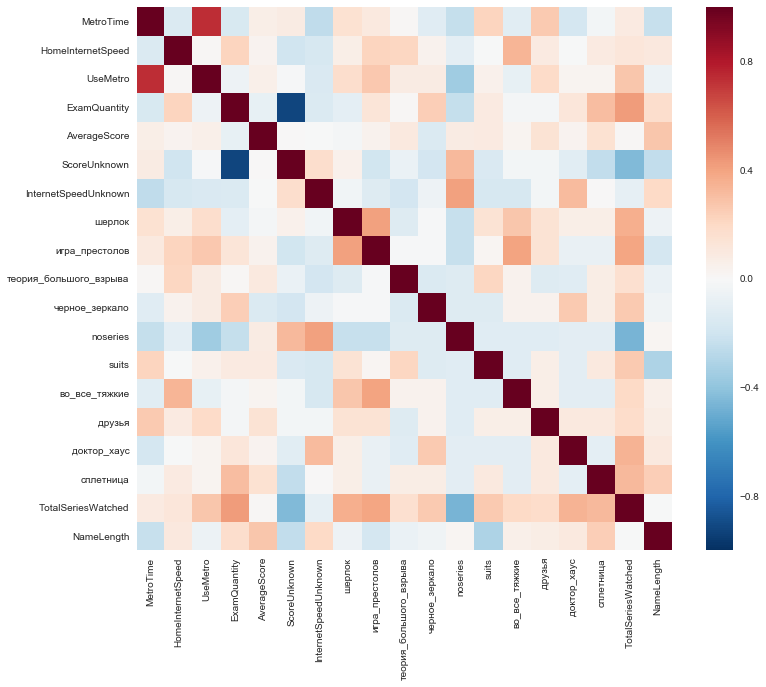

In [59]:
plt.figure(figsize = (12, 10))
sns.heatmap(data.corr('spearman'))

In [60]:
data.columns

Index(['MetroTime', 'HomeInternetSpeed', 'UseMetro', 'ExamQuantity',
       'AverageScore', 'ScoreUnknown', 'InternetSpeedUnknown', 'шерлок',
       'игра_престолов', 'теория_большого_взрыва', 'черное_зеркало',
       'noseries', 'suits', 'во_все_тяжкие', 'друзья', 'доктор_хаус',
       'сплетница', 'TotalSeriesWatched', 'NameLength'],
      dtype='object')

In [122]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# преобразуем все признаки в числовые
X = data.copy()
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[['MetroTime', 'AverageScore', 'NameLength', 'TotalSeriesWatched']] =\
scaler.fit_transform(X[['MetroTime', 'AverageScore', 'NameLength', 'TotalSeriesWatched']])

In [123]:
%%time
tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

CPU times: user 549 ms, sys: 74.9 ms, total: 624 ms
Wall time: 634 ms


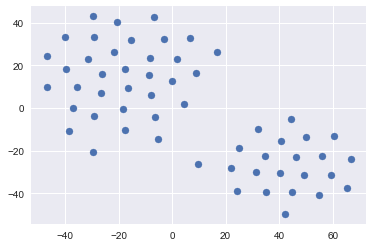

In [124]:
plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1]);

In [125]:
from sklearn.cluster import KMeans

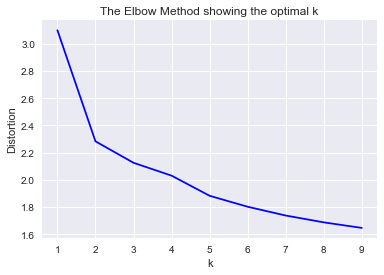

In [126]:
from sklearn import metrics
from scipy.spatial.distance import cdist

# k means determine k
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_scaled)
    distortions.append(sum(np.min(cdist(X_scaled, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X_scaled.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [127]:
kmeanModel = KMeans(n_clusters=2)
kmeanModel.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [128]:
kmeanModel.labels_

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1], dtype=int32)

In [129]:
X['clusterLabels'] = kmeanModel.labels_
X_scaled['clusterLabels'] = kmeanModel.labels_

In [130]:
X.clusterLabels.value_counts()

1    34
0    22
Name: clusterLabels, dtype: int64

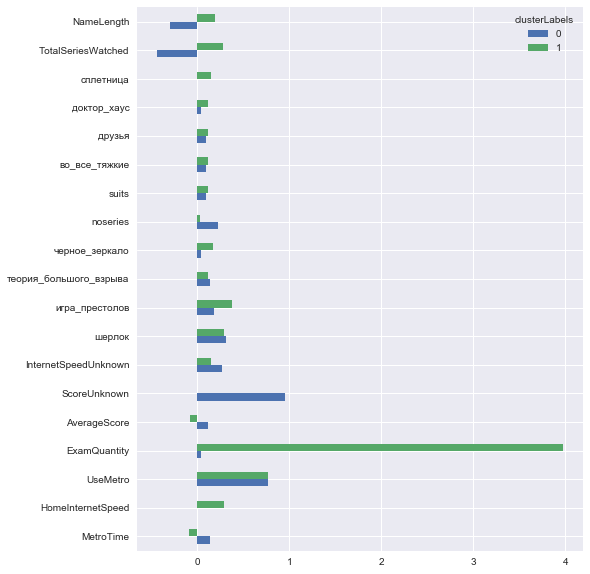

In [131]:
X_scaled.groupby('clusterLabels').mean().T.plot.barh(figsize=(8, 10));

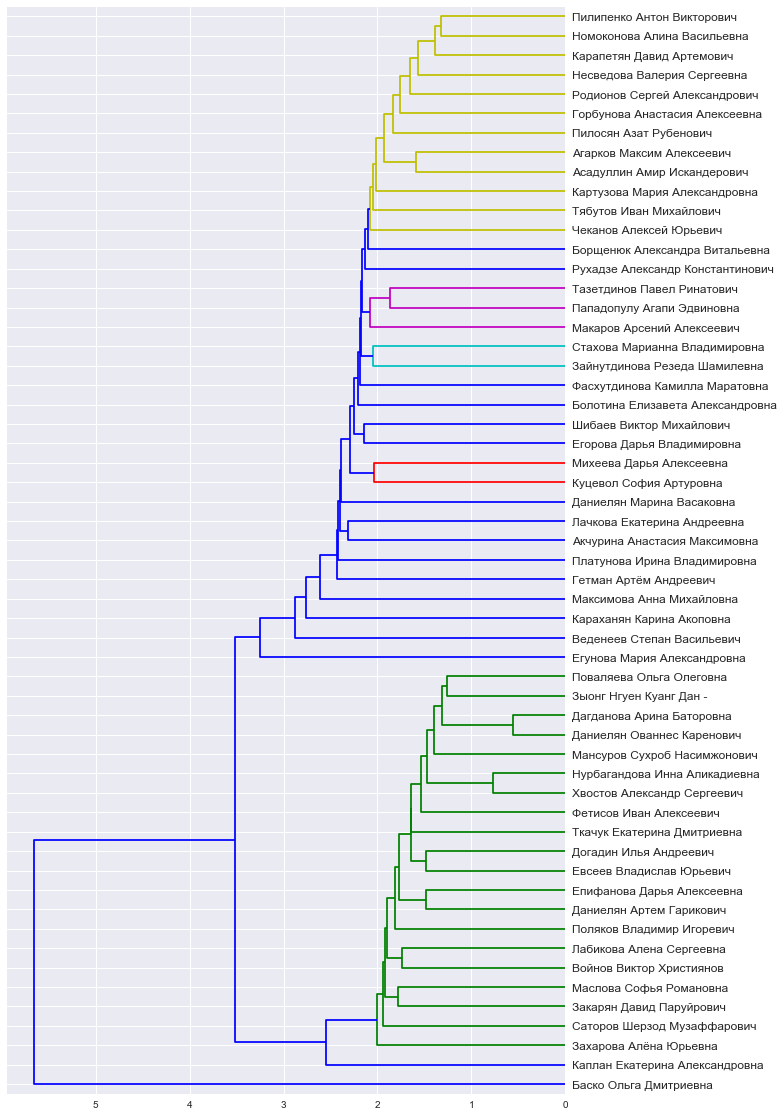

In [142]:
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

distance_mat = pdist(X_scaled) # pdist посчитает нам верхний треугольник матрицы попарных расстояний

Z = hierarchy.linkage(distance_mat, 'single') # linkage — реализация агломеративного алгоритма
plt.figure(figsize=(10, 20))
dn = hierarchy.dendrogram(Z, color_threshold=2.1, labels=X.index,leaf_font_size=12., orientation='left')

In [72]:
Z.shape

(55, 4)